# 전처리 사용 설명서

## 1. 데이터 전처리 소개 및 필요성

### 1) 데이터 전처리란?
- 데이터가 가지고 있는 오류 사항을 점검하고 데이터의 구조 및 특성을 우리의 쓰임에 맞춰 용이하게 수정하는 과정

### 2) 전처리의 필요성
#### [ 이상값, 결측값의 영향 ]
- 이상값이 존재한다면 데이터가 불완전하기 때문에 오차 분산을 증가시키고 추정치가 편향되는 등 데이터 분석의 결과 자체에 영향을 주게 됨


- 결측값이 존재하는데 그것을 처리하지 않고 데이터 분석을 진행한다면 그 데이터를 통해 얻은 결과는 유의미하다고 볼 수 없음


- 유의미한 결과를 얻어내기 위해서는 이상값과 결측값을 제거 및 대체하는 과정 필요

#### [ 데이터 파악 및 가공 ] 
- 본격적으로 분석에 들어가기 앞서 먼저 결측치나 이상값이 존재하는지, 데이터의 단위가 잘못되어 있는지 등 데이터의 상태와 가치에 대해 파악하는 과정 필요


- 우리가 해당 데이터를 사용하려는 목적에 맞춰 '범주형 데이터를 숫자로 변경'하거나, '수치 데이터의 분포를 정규화'하는 등의 과정 필요

## 2. 결측치 처리
- 결측치는 컬럼에 값이 없는, 즉 NULL인 경우를 의미하며 numpy의 NaN으로 표시

### 1) 결측치 여부 확인하기: isna()
- isna(): 데이터가 NaN인지 아닌지를 알려주는 API, 모든 컬럼의 값이 NaN인지 아닌지를 True나 False로 변환하여 알려줌

In [1]:
# csv 데이터 가져오기
import pandas as pd
df = pd.read_csv('./data/train.csv')
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [2]:
df.isna().head(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          1
chlorides               0
free sulfur dioxide     2
total sulfur dioxide    0
density                 0
pH                      0
sulphates               2
alcohol                 0
type                    0
dtype: int64

### 2) 결측치 대체하기: fillna()
- fillna(): 결측치를 편리하게 다른 값으로 대체할 수 있는 API

In [4]:
df_na = df
df_na['residual sugar'] = df_na['residual sugar'].fillna(0)

In [5]:
df_na['residual sugar'].isna().sum()

0

## 3. 데이터 삭제: Drop
- drop(): 데이터를 삭제할 때 사용

In [6]:
# axis = 1
df_drop = df.drop('chlorides', axis=1)
df_drop.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [7]:
# axis = 0
df_drop = df.drop([0, 1, 2], axis=0)
df_drop.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
3,3,6,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.9939,3.26,0.50,10.8,white
4,4,6,7.8,0.40,0.26,9.5,0.059,32.0,178.0,0.9955,3.04,0.43,10.9,white
5,5,6,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.9932,3.08,0.66,12.0,white


In [8]:
df.head(3)  # inplace=False(디폴트): 원본 DataFrame은 유지

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [9]:
# inplace = True
df1 = df
drop_result = df1.drop('chlorides', axis=1, inplace=True)
print('inplace = True로 drop 후 반환된 값:', drop_result)
df1.head(3)

inplace = True로 drop 후 반환된 값: None


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [10]:
df0 = df
df0 = df0.drop('fixed acidity', axis=1, inplace=True)
print(df0)

None


## 4. 데이터 병합: Merge

- 기준열 이름이 같을 때 
    
    pd.merge(left, right, on='기준열', how='조인방식')


- 기준열 이름이 다를 때 
    
    pd.merge(left, right, left_on='왼쪽 열', right_on='오른쪽 열', how='조인방식')

### 1) how: 결합 방법
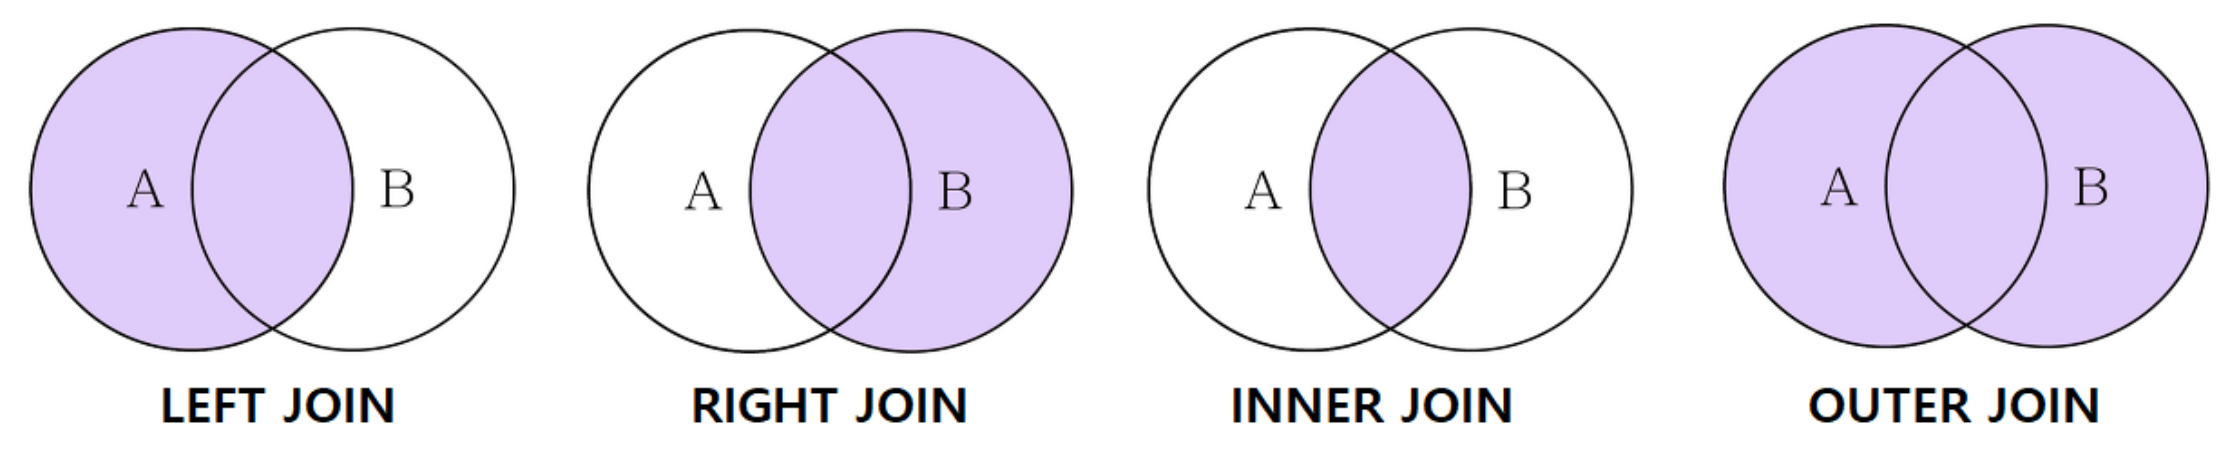

In [11]:
# 예시 데이터 생성
fruit = pd.DataFrame({'Num': [123, 456, 789, 1011, 1112], 
                      'Fruit': ['Apple', 'Banana', 'Cherry', 'Lemon', 'Peach']})
grade = pd.DataFrame({'Num': [123, 789, 1314], 'Grade': ['A', 'B', 'C']})
print(fruit)
print(grade)

    Num   Fruit
0   123   Apple
1   456  Banana
2   789  Cherry
3  1011   Lemon
4  1112   Peach
    Num Grade
0   123     A
1   789     B
2  1314     C


In [12]:
# left join: 왼쪽 데이터프레임 기준 결합
pd.merge(fruit, grade, on='Num', how='left')

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN


In [13]:
# right join: 오른쪽 데이터프레임 기준 결합
pd.merge(fruit, grade, on='Num', how='right')

,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B
2,1314,NaN,C


In [14]:
# inner join: 교집합
pd.merge(fruit, grade, on='Num', how='inner')

,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B


In [15]:
# outer join: 모든 값이 나타나도록 함
pd.merge(fruit, grade, on='Num', how='outer')

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN
5,1314,NaN,C


### 2) on = 기준열
- 공통이 되는 기준 열이 여러 개일 때

    pd.merge(left, right, on=['col1', 'col2'])
    

- 두 데이터프레임의 열 이름이 다를 때

    pd.merge(left, right, on='왼쪽 열', right_on='오른쪽 열')

## 5. Datetime형 처리
- Datetime: 날짜와 시간을 처리할 수 있는 파이썬 내장 모듈

### 1) timedelta (주, 일, 시, 분, 초, 밀리 초, 마이크로 초)
- timedelta 클래스: 기간을 표현하기 위해서 사용

In [16]:
# timedelta 클래스 import
from datetime import timedelta

# 기간 표현
timedelta(days=5, hours=17, minutes=30)

datetime.timedelta(days=5, seconds=63000)

In [17]:
from datetime import date, timedelta
today = date.today()
print(today)

# 1주의 기간을 담은 변수 생성
one_week = timedelta(weeks=1)
print(one_week)

# 다음 주 구하기
next_week = today + one_week
print(next_week)

# 2주의 기간을 담은 변수 생성
two_weeks = one_week * 2
print(two_weeks)

# 두 변수의 대소 관계
print(one_week < two_weeks)

# 내용이 같은지 파악
print(two_weeks == timedelta(weeks=14))

# 저번 주 구하기
last_week = next_week - two_weeks
print(last_week)

2022-10-11
7 days, 0:00:00
2022-10-18
14 days, 0:00:00
True
False
2022-10-04


### 2) timezone
- timezoone 클래스: 시간대를 표현하기 위해 사용

In [18]:
from datetime import timedelta, timezone

# timedelta를 이용해서 시간대 표현
timezone(timedelta(hours=9))

datetime.timezone(datetime.timedelta(seconds=32400))

### 3) date (연, 월, 일)
- date 클래스: 날짜를 표현하는데 사용

In [19]:
from datetime import date

# 날짜 표현
date(2019, 12, 25)

datetime.date(2019, 12, 25)

#### [ today ]
- today(): 오늘 날짜 얻을 때 사용

In [20]:
date.today()

datetime.date(2022, 10, 11)

#### [ isoformat() ]
- isoformat(): date 객체를 YYYY-MM-DD 형태의 문자열로 변환

In [21]:
today.isoformat()

'2022-10-11'

#### [ fromisoformat() ]
- fromisoformat(): YYYY-MM-DD 형태의 문자열을 date 객체로 변환

In [22]:
date.fromisoformat('2020-07-18')

datetime.date(2020, 7, 18)

#### [ year, month, day 접근 ]
- date 객체 내에 있는 연, 월, 일 데이터는 각각 year, month, day 속성을 통해 접근

In [23]:
today = date.today()

print(today.year)
print(today.month)
print(today.day)

2022
10
11


#### [ weekday() & isoweekday() ]
- 해당 날짜가 무슨 요일인지를 파악하기 위해 사용


- weekday()는 월요일이 0으로 시작 / isoweekday()는 월요일이 1로 시작

In [24]:
print(today.weekday())
print(today.isoweekday())

1
2


#### [ replace() ]
- replace(): date 객체의 연, 월, 일 데이터 변경 가능


- date 객체는 불변하기 때문에 속성값이 변경된 새로운 date 객체를 생성하여 반환

In [25]:
today.replace(year=2018)

datetime.date(2018, 10, 11)

### 4) time (시, 분, 초, 마이크로 초, 시간대)
- time 클래스: 시간을 표현하기 위해 사용

In [26]:
from datetime import time

# 시간 생성
time(13, 42, 35)

datetime.time(13, 42, 35)

#### [ isoformat() ]
- isoformat(): time 객체를 HH[:MM[:SS[.fff[fff]]]][+HH:MM[:SS[.ffffff]]] 형태의 문자열로 변환

In [27]:
from datetime import time, timedelta, timezone
t = time(13, 42, 35, 458000, tzinfo=timezone(timedelta(hours=9)))
t.isoformat()

'13:42:35.458000+09:00'

#### [ fromisoformat() ]
- froisoformat(): HH[:MM[:SS[.fff[fff]]]][+HH:MM[:SS[.ffffff]]] 형태의 문자열을 time 객체로 변환

In [28]:
time.fromisoformat('13:42:35.458+09:00')

datetime.time(13, 42, 35, 458000, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400)))

#### [ hour, minute, second 접근 ]
- time 객체가 보관하고 있는 시, 분, 초 데이터는 각각 hour, minute, second 속성을 통해 접근 가능

In [29]:
t = time(13, 42, 35, 458000, tzinfo=timezone(timedelta(hours=9)))

print(t.hour)
print(t.minute)
print(t.second)
print(t.microsecond)
print(t.tzinfo)

13
42
35
458000
UTC+09:00


#### [ replace() ]
- replace 메소드: time 객체의 시, 분, 초 데이터 변경 가능


- date 클래스와 마찬가지로 time 클래스도 불변하기 때문에 새로운 time 객체가 생성되어 반환

In [30]:
t.replace(hour=14)

datetime.time(14, 42, 35, 458000, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400)))

### 5) datetime (연, 월, 일, 시, 분, 초, 마이크로 초, 시간대)
- datetime 클래스: 날짜와 시간을 동시에 표현하기 위해서 사용

In [31]:
from datetime import datetime
datetime(2020, 7, 18, 13, 26, 23)

datetime.datetime(2020, 7, 18, 13, 26, 23)

#### [ combine() ]
- combine(): 기존에 생성해둔 date나 time 객체를 활용해서 datetime 객체 생성

In [32]:
from datetime import date, datetime, time

d = date(2020, 7, 18)
t = time(13, 26, 23)

datetime.combine(d, t)

datetime.datetime(2020, 7, 18, 13, 26, 23)

#### [ now() ]
- now(): 현재 시각 알 수 있음

In [33]:
from datetime import datetime, timezone
datetime.now()

datetime.datetime(2022, 10, 11, 15, 38, 10, 543274)

#### [ strftime() ]
- strftime(): datetime 객체를 다양한 포맷의 문자열로 변환

In [34]:
# Y/m/d 형태의 문자열로 변환
today.strftime('%Y/%m/%d')

'2022/10/11'

In [35]:
# Y-m-d 형태의 문자열로 변환
today.strftime('%Y-%m-%d')

'2022-10-11'

In [36]:
# 날짜와 시간으로 변환
today.strftime('%c')

'Tue Oct 11 00:00:00 2022'

#### [ strptime() ]
- strptime(): 다양한 포맷의 문자열을 datetime 객체로 변환

In [37]:
datetime.strptime('2020/07/18', '%Y/%m/%d')

datetime.datetime(2020, 7, 18, 0, 0)

## 6. 데이터 인코딩 (encoding)
- 인코딩: 문자열 값을 숫자형으로 변환하는 과정


    - 카데고리형 피처: 카테고리 의미대로 특정 분류에 쓰이는 경우
    - 텍스트형 피처: 주민번호나 단순 문자열 id와 같은 데이터의 경우 예측 성능을 떨어뜨리는 경우가 많기 때문에 삭제하는 것이 좋음

### 1) 레이블 인코딩 (label encoding)
- 레이블 인코딩: LabelEncoder 클래스로 구현


    - fit(): 문자열 데이터를 숫자형으로 바꾸는 메소드
    - transform(): 변환된 숫자형 데이터 값을 반환하는 메소드

In [38]:
from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [39]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [40]:
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 2) 원-핫 인코딩 (One-Hot encoding)
- 원-핫 인코딩: 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시

#### [ 변환할 때 주의할 점 ]
- OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환되어야 함
- 입력 값으로 2차원 데이터가 필요함

In [41]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자값으로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [42]:
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

In [43]:
# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())

print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


#### [ get_dummies() ]
- get_dummies(): 판다스에서 원-핫 인코딩을 더 쉽게 지원하는 API


- 문자열 카테고리 값을 숫자형으로 먼저 변환할 필요없이 바로 변환 가능

In [44]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 7. 스케일링 (Scailing)

### 1) 스케일링이란?
- 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞춰주는 작업


#### [ 주의할 점 ]
- 모두 같은 분포로 만들 필요 없음


- 훈련 데이터에는 fit_transform() 적용 / 테스트 데이터에는 transform() 적용


- transform()을 호출할 때 스케일 변환된 데이터 셋을 DataFrame으로 변환해야 함


#### [ 스케일링의 필요성 ]
- 편향성 방지


- 데이터 간의 상관성이 없다고 판단할 가능성 존재

### 2) 표준화 VS 정규화
- 표준화를 통해 이상치를 제거한 후 정규화를 통해 상대적인 크기에 대한 영향 줄임
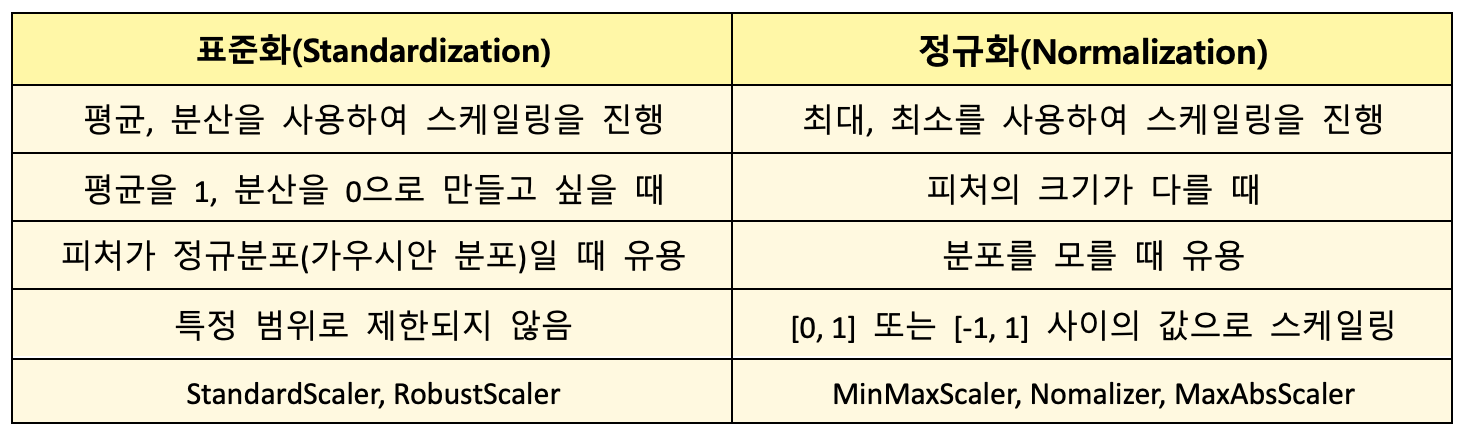

### 3) 표준화 (Standardization)
- 표준화: 특성들의 평균을 0, 분산을 1로 만드는 것 -> 특성들의 분포를 정규분포로 만드는 과정

#### [ StandardScaler ]
- 개별 피처를 평균이 0, 분산이 1인 값으로 변환해주는 표준화 클래스


- 이상치에 매우 민감


- 회귀보다 분류에 유용한 클래스

In [45]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균')
print(iris_df.mean())
print('\nfeature 들의 분산')
print(iris_df.var())

feature 들의 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [46]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 셋 변환 후 fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산')
print(iris_df_scaled.var())

feature 들의 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### [ RobustScaler ]
- 평균과 분산 대신 중앙값과 사분위값을 사용하여 이상치에 영향 최소화


- RobustScaler()를 사용하여 중앙값이 0, IQR(Q3-Q1)이 1이 되도록 변환


- 모든 피처가 같은 크기를 같는다는 점이 StandardScaler와 유사

In [47]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'x1': np.arange(11), 'x2': np.arange(11) ** 2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [50]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
scaler = RobustScaler()

# RobustScaler로 데이터 셋 변환
df_robust = scaler.fit_transform(df)

# transform()시 scale 변환된 데이터 셋 DataFrame으로 변환
df_robust1 = pd.DataFrame(df_robust, columns=['x1_robust', 'x2_robust'])
df_robust1

,x1_robust,x2_robust
0,-1.0,-0.50
1,-0.8,-0.48
2,-0.6,-0.42
3,-0.4,-0.32
4,-0.2,-0.18
5,0.0,0.00
6,0.2,0.22
7,0.4,0.48
8,0.6,0.78
9,0.8,1.12


In [51]:
print(df_robust1.describe())

Q1 = df_robust1.quantile(.25)
Q2 = df_robust1.quantile(.50)
Q3 = df_robust1.quantile(.75)
IQR = Q3 - Q1

print('median:', Q2)
print('IQR:', IQR)

          x1_robust  x2_robust
count  1.100000e+01  11.000000
mean   2.018587e-17   0.200000
std    6.633250e-01   0.688709
min   -1.000000e+00  -0.500000
25%   -5.000000e-01  -0.370000
50%    0.000000e+00   0.000000
75%    5.000000e-01   0.630000
max    1.000000e+00   1.500000
median: x1_robust    0.0
x2_robust    0.0
Name: 0.5, dtype: float64
IQR: x1_robust    1.0
x2_robust    1.0
dtype: float64


### 4) 정규화 (Normalization)
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환하는 과정


- 일반적으로 [0, 1] 범위의 분포로 조정


- 표준화의 결과에서 이상치를 제거한 후 정규화를 하는 것이 좋음

#### [ 정규화를 하는 이유 ]
- 각 컬럼에 들어있는 데이터의 상대적인 크기로 분석 결과가 달라질 수 있기 때문에 이러한 상대적인 크기 차이를 제거할 필요 있음


- 정규화를 하지 않는다면 수치가 큰 데이터가 결과에 큰 영향을 주어 좋은 결과를 얻을 수 없음

#### [ MinMaxScaler ]
- MinMaxScaler(): 각 피처의 최소값과 최대값을 기준으로 [0, 1] 사이 범위에 균등하게 값을 배정하는 정규화 방법


- 음수 값이 있으면 [-1, 1] 사이의 값으로 변환


- 데이터의 분포가 정규분포를 따르지 않을 때, MinMaxScaler를 이용할 수 있음

In [52]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최소값')
print(iris_df_scaled.min())

print('feature들의 최대값')
print(iris_df_scaled.max())

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### [ MaxAbsScaler ]
- MaxAbsScaler(): 각 특성의 절대값이 0과 1 사이가 되도록 변환하는 과정


- 모든 값은 [-1, 1] 사이의 값으로 표현되며 데이터가 양수일 경우 MinMaxScaler와 유사함


- 이상치에 매우 민감

In [53]:
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [54]:
from sklearn.preprocessing import MaxAbsScaler

# MaxAbsScaler 객체 생성
maxabs_scaler = MaxAbsScaler()

# MaxAbsScaler로 데이터 셋 변환
maxabs_scaler.fit(df)
maxabs_scaled = maxabs_scaler.transform(df)

# transform() 시 scale 변환된 데이터 셋 DataFrame으로 변환
df_maxabs = pd.DataFrame(maxabs_scaled, columns = ['x1_maxabs', 'x2_maxabs'])
df_maxabs

,x1_maxabs,x2_maxabs
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81
